In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [300]:
df_movies = pd.read_csv('/kaggle/input/movie-data/movies.csv')
df_links = pd.read_csv('/kaggle/input/movie-data/links.csv')
df_ratings = pd.read_csv('/kaggle/input/movie-data/ratings.csv')
df_tags = pd.read_csv('/kaggle/input/movie-data/tags.csv')

In [301]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


df_ratings.shape

In [302]:
df_ratings['userId'].nunique()     

610

In [303]:
df_movies.head

<bound method NDFrame.head of       movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                                  Comedy|Romance  
3                            Comedy|Drama

In [304]:
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [305]:
df_links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [306]:
df_ratings_movies = pd.merge(df_ratings, df_movies, on='movieId', how='inner')

In [307]:
df_ratings_movies.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [308]:
ratings_count_per_movie = df_ratings_movies.groupby('title')['userId'].count()

In [309]:
max_ratings_movie = ratings_count_per_movie.idxmax()

print("Movie with Maximum Number of User Ratings:")
print(max_ratings_movie)

Movie with Maximum Number of User Ratings:
Forrest Gump (1994)


In [310]:
df_tags_movies = pd.merge(df_tags, df_movies, on='movieId', how='inner')

In [311]:
df_tags_movies.head()

,userId,movieId,tag,timestamp,title,genres
0,2,60756,funny,1445714994,Step Brothers (2008),Comedy
1,2,60756,Highly quotable,1445714996,Step Brothers (2008),Comedy
2,2,60756,will ferrell,1445714992,Step Brothers (2008),Comedy
3,62,60756,comedy,1528934384,Step Brothers (2008),Comedy
4,62,60756,funny,1528934381,Step Brothers (2008),Comedy


In [312]:
selected_tags = df_tags_movies[df_tags_movies['movieId'].isin(df_tags_movies[df_tags_movies['title'] == 'Matrix, The (1999)']['movieId'])]['tag'].unique()

In [313]:
selected_tags

array(['martial arts', 'sci-fi', 'alternate universe', 'philosophy',
       'post apocalyptic'], dtype=object)

In [314]:
average_ratings_movie = df_ratings_movies.groupby('title')['rating'].mean()

In [315]:
average_ratings_movie['Terminator 2: Judgment Day (1991)']

3.970982142857143

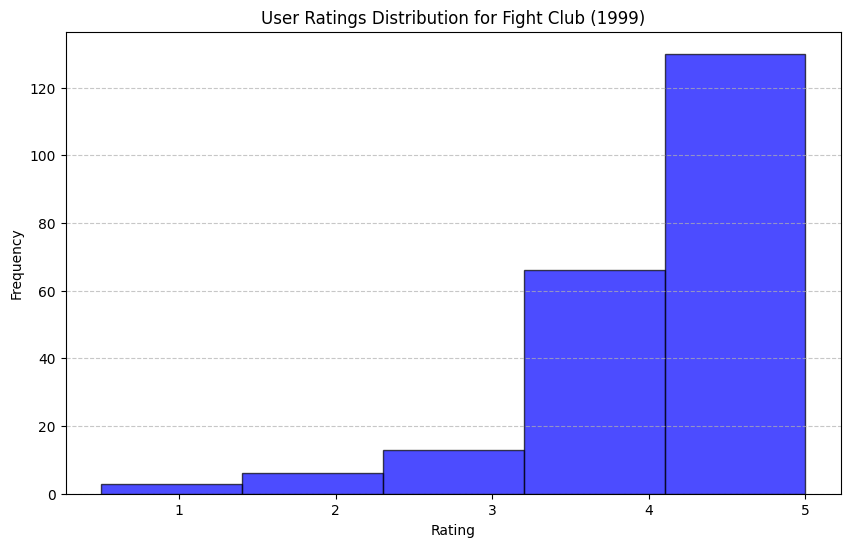

In [316]:
import matplotlib.pyplot as plt
fight_club_ratings = df_ratings_movies[df_ratings_movies['title'] == 'Fight Club (1999)']['rating']

# Plotting a histogram
plt.figure(figsize=(10, 6))
plt.hist(fight_club_ratings, bins=5, color='blue', edgecolor='black', alpha=0.7)
plt.title('User Ratings Distribution for Fight Club (1999)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Note-1 questions**

In [317]:
# Group by 'movieId' and apply aggregation operations
ratings_grouped = df_ratings.groupby('movieId').agg({'rating': ['count', 'mean']})

# Rename the columns for clarity
ratings_grouped.columns = ['num_ratings', 'average_rating']

In [318]:
ratings_grouped.head()

,num_ratings,average_rating
movieId,,
1,215,3.920930
2,110,3.431818
3,52,3.259615
4,7,2.357143
5,49,3.071429


In [319]:
dfnew_ratings_movies = pd.merge(ratings_grouped, df_movies, on='movieId', how='inner')

In [320]:
dfnew_ratings_movies = dfnew_ratings_movies[dfnew_ratings_movies['num_ratings'] > 50]

In [321]:
dfnew_ratings_movies.head()

,movieId,num_ratings,average_rating,title,genres
0,1,215,3.920930,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,110,3.431818,Jumanji (1995),Adventure|Children|Fantasy
2,3,52,3.259615,Grumpier Old Men (1995),Comedy|Romance
5,6,102,3.946078,Heat (1995),Action|Crime|Thriller
6,7,54,3.185185,Sabrina (1995),Comedy|Romance


In [322]:
dfnew_ratings_movies.loc[dfnew_ratings_movies['average_rating'].idxmax(), 'title']

'Shawshank Redemption, The (1994)'

In [323]:
dfnew_ratings_movies.sort_values(by='num_ratings', ascending=False).head(5)

,movieId,num_ratings,average_rating,title,genres
314,356,329,4.164134,Forrest Gump (1994),Comedy|Drama|Romance|War
277,318,317,4.429022,"Shawshank Redemption, The (1994)",Crime|Drama
257,296,307,4.197068,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
510,593,279,4.161290,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
1938,2571,278,4.192446,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [324]:
# Filter Sci-Fi movies
sci_fi_df = dfnew_ratings_movies[dfnew_ratings_movies['genres'].str.contains('Sci-Fi')]

# Sort by the number of ratings in descending order
sorted_sci_fi = sci_fi_df.sort_values(by='num_ratings', ascending=False)

# Get the third most popular Sci-Fi movie
third_most_popular_sci_fi = sorted_sci_fi.iloc[2]

print("Third most popular Sci-Fi movie:")
print(third_most_popular_sci_fi[['movieId', 'num_ratings', 'average_rating', 'title', 'genres']])


Third most popular Sci-Fi movie:
movieId                                        480
num_ratings                                    238
average_rating                                3.75
title                         Jurassic Park (1993)
genres            Action|Adventure|Sci-Fi|Thriller
Name: 418, dtype: object


**Note-2 Questions**

In [325]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [326]:
dfnew_ratings_movies_links = pd.merge(dfnew_ratings_movies, df_links, on='movieId', how='inner')

In [327]:
dfnew_ratings_movies_links.head()

,movieId,num_ratings,average_rating,title,genres,imdbId,tmdbId
0,1,215,3.920930,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,2,110,3.431818,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0
2,3,52,3.259615,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
3,6,102,3.946078,Heat (1995),Action|Crime|Thriller,113277,949.0
4,7,54,3.185185,Sabrina (1995),Comedy|Romance,114319,11860.0


In [330]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', attrs={'class' : 'sc-bde20123-1 cMEQkK'})
    return imdb_rating.text if imdb_rating else np.nan




In [331]:
import time
# Loop through each row in the DataFrame
for index, row in dfnew_ratings_movies_links.iterrows():
    imdb_id = row['imdbId']
    imdb_rating = scrapper(imdb_id)
    
    # Explicitly cast to float if IMDb rating is not NaN
    imdb_rating_float = float(imdb_rating) if not pd.isna(imdb_rating) else np.nan
    
    dfnew_ratings_movies_links.at[index, 'imdb_rating'] = imdb_rating_float
    time.sleep(0.01)
# Display the DataFrame with IMDb ratings
print(dfnew_ratings_movies_links)

     movieId  num_ratings  average_rating                             title  \
0          1          215        3.920930                  Toy Story (1995)   
1          2          110        3.431818                    Jumanji (1995)   
2          3           52        3.259615           Grumpier Old Men (1995)   
3          6          102        3.946078                       Heat (1995)   
4          7           54        3.185185                    Sabrina (1995)   
..       ...          ...             ...                               ...   
431   106782           54        3.916667   Wolf of Wall Street, The (2013)   
432   109374           52        3.778846  Grand Budapest Hotel, The (2014)   
433   109487           73        3.993151               Interstellar (2014)   
434   112852           59        4.050847    Guardians of the Galaxy (2014)   
435   122904           54        3.833333                   Deadpool (2016)   

                                          genres   

In [332]:
dfnew_ratings_movies_links.head()

,movieId,num_ratings,average_rating,title,genres,imdbId,tmdbId,imdb_rating
0,1,215,3.920930,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,8.3
1,2,110,3.431818,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0,7.1
2,3,52,3.259615,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,6.6
3,6,102,3.946078,Heat (1995),Action|Crime|Thriller,113277,949.0,8.3
4,7,54,3.185185,Sabrina (1995),Comedy|Romance,114319,11860.0,6.3


In [333]:
dfnew_ratings_movies_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movieId         436 non-null    int64  
 1   num_ratings     436 non-null    int64  
 2   average_rating  436 non-null    float64
 3   title           436 non-null    object 
 4   genres          436 non-null    object 
 5   imdbId          436 non-null    int64  
 6   tmdbId          436 non-null    float64
 7   imdb_rating     436 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 27.4+ KB


In [334]:
dfnew_ratings_movies_links.loc[dfnew_ratings_movies_links['imdb_rating'].idxmax(), 'movieId']

318

In [336]:
sci_fi_df = dfnew_ratings_movies_links[dfnew_ratings_movies_links['genres'].str.contains('Sci-Fi')]

max_rating_sci_fi_movieId = sci_fi_df.loc[sci_fi_df['imdb_rating'].idxmax(), 'movieId']

In [337]:
max_rating_sci_fi_movieId 

79132